## 預測鐵達尼號存活率
### 使用Kaggle上的資料庫，預測「鐵達尼號存活率」。

題目:
我們今天的目標，是利用其中的「性別 Sex」跟「年齡 Age」來預測「存活與否 Survived」(1是存活，0則否）。

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### 1.首先，請使用pandas套件讀檔

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


#### 2.請取出所有的Age跟Sex作為題目，和Survived做為答案並分成三個同名的numpy array。 (提示： Age.shape = (891, ))

In [4]:
Age = np.array(df.Age)

In [5]:
Age

array([22.  , 38.  , 26.  , 35.  , 35.  ,   nan, 54.  ,  2.  , 27.  ,
       14.  ,  4.  , 58.  , 20.  , 39.  , 14.  , 55.  ,  2.  ,   nan,
       31.  ,   nan, 35.  , 34.  , 15.  , 28.  ,  8.  , 38.  ,   nan,
       19.  ,   nan,   nan, 40.  ,   nan,   nan, 66.  , 28.  , 42.  ,
         nan, 21.  , 18.  , 14.  , 40.  , 27.  ,   nan,  3.  , 19.  ,
         nan,   nan,   nan,   nan, 18.  ,  7.  , 21.  , 49.  , 29.  ,
       65.  ,   nan, 21.  , 28.5 ,  5.  , 11.  , 22.  , 38.  , 45.  ,
        4.  ,   nan,   nan, 29.  , 19.  , 17.  , 26.  , 32.  , 16.  ,
       21.  , 26.  , 32.  , 25.  ,   nan,   nan,  0.83, 30.  , 22.  ,
       29.  ,   nan, 28.  , 17.  , 33.  , 16.  ,   nan, 23.  , 24.  ,
       29.  , 20.  , 46.  , 26.  , 59.  ,   nan, 71.  , 23.  , 34.  ,
       34.  , 28.  ,   nan, 21.  , 33.  , 37.  , 28.  , 21.  ,   nan,
       38.  ,   nan, 47.  , 14.5 , 22.  , 20.  , 17.  , 21.  , 70.5 ,
       29.  , 24.  ,  2.  , 21.  ,   nan, 32.5 , 32.5 , 54.  , 12.  ,
         nan, 24.  ,

In [6]:
Sex = np.array(df.Sex)

In [7]:
Sex

array(['male', 'female', 'female', 'female', 'male', 'male', 'male',
       'male', 'female', 'female', 'female', 'female', 'male', 'male',
       'female', 'female', 'male', 'male', 'female', 'female', 'male',
       'male', 'female', 'male', 'female', 'female', 'male', 'male',
       'female', 'male', 'male', 'female', 'female', 'male', 'male',
       'male', 'male', 'male', 'female', 'female', 'female', 'female',
       'male', 'female', 'female', 'male', 'male', 'female', 'male',
       'female', 'male', 'male', 'female', 'female', 'male', 'male',
       'female', 'male', 'female', 'male', 'male', 'female', 'male',
       'male', 'male', 'male', 'female', 'male', 'female', 'male', 'male',
       'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'female', 'male', 'male', 'female', 'male', 'female', 'female',
       'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'female', 'male', 'female', 'male',
      

In [8]:
Survived = np.array(df.Survived)

In [9]:
Survived

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

#### 3.其中，由於Age有一些值是空值NaN，請把這些空值都先換成0。提示： 可使用 np.isnan(某個你想確認是不是NaN的年齡) ）

In [10]:
np.isnan(Age)

array([False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False, False,  True,
       False,  True,  True, False,  True,  True, False, False, False,
        True, False, False, False, False, False,  True, False, False,
        True,  True,  True,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
        True, False,

In [11]:
Age = np.nan_to_num(Age)
# Age[np.isnan(Age)] = 0

In [12]:
Age

array([22.  , 38.  , 26.  , 35.  , 35.  ,  0.  , 54.  ,  2.  , 27.  ,
       14.  ,  4.  , 58.  , 20.  , 39.  , 14.  , 55.  ,  2.  ,  0.  ,
       31.  ,  0.  , 35.  , 34.  , 15.  , 28.  ,  8.  , 38.  ,  0.  ,
       19.  ,  0.  ,  0.  , 40.  ,  0.  ,  0.  , 66.  , 28.  , 42.  ,
        0.  , 21.  , 18.  , 14.  , 40.  , 27.  ,  0.  ,  3.  , 19.  ,
        0.  ,  0.  ,  0.  ,  0.  , 18.  ,  7.  , 21.  , 49.  , 29.  ,
       65.  ,  0.  , 21.  , 28.5 ,  5.  , 11.  , 22.  , 38.  , 45.  ,
        4.  ,  0.  ,  0.  , 29.  , 19.  , 17.  , 26.  , 32.  , 16.  ,
       21.  , 26.  , 32.  , 25.  ,  0.  ,  0.  ,  0.83, 30.  , 22.  ,
       29.  ,  0.  , 28.  , 17.  , 33.  , 16.  ,  0.  , 23.  , 24.  ,
       29.  , 20.  , 46.  , 26.  , 59.  ,  0.  , 71.  , 23.  , 34.  ,
       34.  , 28.  ,  0.  , 21.  , 33.  , 37.  , 28.  , 21.  ,  0.  ,
       38.  ,  0.  , 47.  , 14.5 , 22.  , 20.  , 17.  , 21.  , 70.5 ,
       29.  , 24.  ,  2.  , 21.  ,  0.  , 32.5 , 32.5 , 54.  , 12.  ,
        0.  , 24.  ,

#### 4.再來，Sex部分因為都是文字，不方便我們做svm，請把Male都換成0，Female都換成1

In [13]:
Sex[Sex == 'male'] = 0
Sex[Sex == 'female'] = 1

In [14]:
Sex = np.int64(Sex)

In [15]:
Sex[:10]

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

#### 5.由於我們想把Sex跟Age都當成data，請把Sex和Age兩個array合併成一個。（提示：先用np.reshape，再用np.append）

In [16]:
Age = np.reshape(Age, (len(Age),1))

In [17]:
Sex = np.reshape(Sex, (len(Sex),1))

In [18]:
X = np.append(Age, Sex, axis=1)

In [19]:
X[:8]

array([[22.,  0.],
       [38.,  1.],
       [26.,  1.],
       [35.,  1.],
       [35.,  0.],
       [ 0.,  0.],
       [54.,  0.],
       [ 2.,  0.]])

In [20]:
Y = Survived

In [37]:
Y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

#### 6.實際拿svm 訓練看看，並用同樣的data，predict看看結果（這次不用分training data跟testing data）

In [21]:
from sklearn.svm import 

In [38]:
clf = SVC()

In [39]:
clf.fit(X, Y)

SVC()

In [40]:
predict = clf.predict(X)

In [41]:
print(predict)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

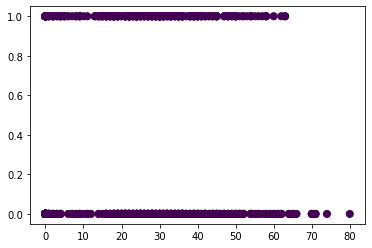

In [43]:
plt.scatter(X[:,0], X[:,1], s=50, c=predict)

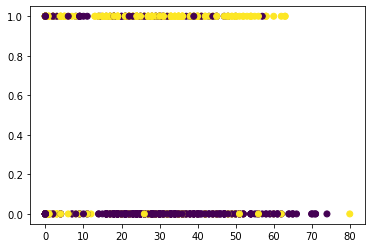

In [42]:
plt.scatter(X[:, 0], X[:, 1],c = Y)

#### 加分題： 請設計一種方法，比較看看你的預測結果，和正確答案(Survived)，找出你的「預測正確率」是多少。

In [85]:
# 1
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(Y, predict).ravel()
Accuracy = (tp+tn)/(tn+fp+fn+tp)
print(f"預測正確率:{Accuracy*100:.2f}%")

預測正確率:61.62%


In [44]:
a = 22

In [45]:
a is 32

<>:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-45-717c0f287fc7>:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
  a is 32


False

In [46]:
a == 32

False